# MLOps Assignment 1

Anusha Bhat 
July 2, 2025

## Create 2 Versions of the Athletes Dataset 

### Read in Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("C:\\Users\\anush\\Downloads\\athletes.csv")

In [3]:
data.head()

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,snatch,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong
0,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,NaN,400.0,305.0,NaN,NaN,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|
1,3517.0,Derek Abdella,NaN,NaN,NaN,Male,42.0,70.0,190.0,NaN,...,NaN,NaN,NaN,NaN,NaN,I have a coach who determines my programming|I...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|
2,4691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5164.0,Abo Brandon,Southern California,LAX CrossFit,LAX CrossFit,Male,40.0,67.0,NaN,211.0,...,200.0,375.0,325.0,25.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|,4+ years|
4,5286.0,Bryce Abbey,NaN,NaN,NaN,Male,32.0,65.0,149.0,206.0,...,150.0,NaN,325.0,50.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I inc...,I played college sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I strictly s...,1-2 years|


In [4]:
data.dtypes

athlete_id    float64
name           object
region         object
team           object
affiliate      object
gender         object
age           float64
height        float64
weight        float64
fran          float64
helen         float64
grace         float64
filthy50      float64
fgonebad      float64
run400        float64
run5k         float64
candj         float64
snatch        float64
deadlift      float64
backsq        float64
pullups       float64
eat            object
train          object
background     object
experience     object
schedule       object
howlong        object
dtype: object

### Version 1

In [5]:
data_1 = data

In [6]:
# calculate total lift
data_1["total_lift"] = data_1["deadlift"] + data_1["candj"] + data_1["snatch"] + data_1["backsq"]

In [7]:
# train-test split 80-20%
train_data1, test_data1 = train_test_split(data_1, test_size = 0.2, random_state = 7)

In [8]:
# save train/test csvs for versioning
train_data1.to_csv("C:\\Users\\anush\\Downloads\\athletes_v1_train.csv", index=False)
test_data1.to_csv("C:\\Users\\anush\\Downloads\\athletes_v1_test.csv", index=False)

### Version 2

In [9]:
# clean data
data_2 = data

# remove not relevant columns
data_2 = data_2.dropna(subset=['region','age','weight','height','howlong','gender','eat', \
                            'train','background','experience','schedule','howlong', \
                            'deadlift','candj','snatch','backsq','experience',\
                            'background','schedule','howlong'])
data_2 = data_2.drop(columns=['affiliate','team','name','athlete_id','fran','helen','grace',\
                            'filthy50','fgonebad','run400','run5k','pullups','train'])

# remove Outliers
data_2 = data_2[data_2['weight'] < 1500]
data_2 = data_2[data_2['gender'] != '--']
data_2 = data_2[data_2['age'] >= 18]
data_2 = data_2[(data_2['height'] < 96) & (data_2['height'] > 48)]

data_2 = data_2[
    ((data_2['gender'] == 'Male') & (data_2['deadlift'] > 0) & (data_2['deadlift'] <= 1105)) |
    ((data_2['gender'] == 'Female') & (data_2['deadlift'] > 0) & (data_2['deadlift'] <= 636))
]
data_2 = data_2[(data_2['candj'] > 0) & (data_2['candj'] <= 395)]
data_2 = data_2[(data_2['snatch'] > 0) & (data_2['snatch'] <= 496)]
data_2 = data_2[(data_2['backsq'] > 0) & (data_2['backsq'] <= 1069)]

# clean Survey Data
decline_dict = {'Decline to answer|': np.nan}
data_2 = data_2.replace(decline_dict)
data_2 = data_2.dropna(subset=['background','experience','schedule','howlong','eat'])

In [10]:
# calculate total lift
data_2["total_lift"] = data_2["deadlift"] + data_2["candj"] + data_2["snatch"] + data_2["backsq"]

In [11]:
# train-test split 80-20%
train_data2, test_data2 = train_test_split(data_2, test_size = 0.2, random_state = 7)

In [12]:
# save train/test csvs for versioning
train_data2.to_csv("C:\\Users\\anush\\Downloads\\athletes_v2_train.csv", index=False)
test_data2.to_csv("C:\\Users\\anush\\Downloads\\athletes_v2_test.csv", index=False)

## EDA Version 1

In [13]:
data_1.columns

Index(['athlete_id', 'name', 'region', 'team', 'affiliate', 'gender', 'age',
       'height', 'weight', 'fran', 'helen', 'grace', 'filthy50', 'fgonebad',
       'run400', 'run5k', 'candj', 'snatch', 'deadlift', 'backsq', 'pullups',
       'eat', 'train', 'background', 'experience', 'schedule', 'howlong',
       'total_lift'],
      dtype='object')

In [58]:
data_1.shape

(423006, 28)

In [55]:
data_1.isnull().sum()

athlete_id         3
name           91896
region        171744
team          267846
affiliate     181090
gender         91896
age            91896
height        263137
weight        193116
fran          367580
helen         392727
grace         382261
filthy50      403647
fgonebad      393268
run400        400760
run5k         386909
candj         318571
snatch        325726
deadlift      307683
backsq        312489
pullups       372398
eat           329074
train         317175
background    324061
experience    318070
schedule      325131
howlong       313800
total_lift    337815
dtype: int64

All columns have several missing values.

In [56]:
data_1.describe()

,athlete_id,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups,total_lift
count,423003.000000,331110.000000,1.598690e+05,229890.000000,5.542600e+04,3.027900e+04,4.074500e+04,1.935900e+04,2.973800e+04,2.224600e+04,3.609700e+04,1.044350e+05,9.728000e+04,1.153230e+05,1.105170e+05,5.060800e+04,8.519100e+04
mean,292748.166538,32.516750,1.206217e+02,170.896137,9.886691e+02,1.207950e+03,5.766025e+02,2.127863e+03,1.472252e+03,5.241279e+02,3.411464e+03,2.709107e+02,2.424957e+02,6.970503e+02,5.852109e+02,4.269613e+04,2.061057e+03
std,184969.660327,7.730671,2.097995e+04,58.379799,7.200430e+04,6.824091e+04,4.891145e+04,6.055021e+04,9.762688e+04,5.628804e+04,1.251980e+05,2.596882e+04,2.708942e+04,5.523235e+04,5.052976e+04,9.546078e+06,1.548460e+05
min,82.000000,13.000000,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,-6.000000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-4.500000e+01,0.000000e+00,-5.000000e+02,-7.000000e+00,-6.000000e+00,-2.200000e+01
25%,135091.500000,27.000000,6.600000e+01,145.000000,2.150000e+02,5.250000e+02,1.490000e+02,1.308000e+03,2.400000e+02,6.200000e+01,1.242000e+03,1.400000e+02,1.050000e+02,2.550000e+02,2.050000e+02,1.500000e+01,7.330000e+02
50%,275839.000000,31.000000,6.900000e+01,170.000000,2.900000e+02,5.950000e+02,1.930000e+02,1.550000e+03,2.940000e+02,7.100000e+01,1.380000e+03,1.950000e+02,1.450000e+02,3.450000e+02,2.750000e+02,2.700000e+01,9.850000e+02
75%,473188.000000,37.000000,7.200000e+01,192.000000,3.920000e+02,6.940000e+02,2.620000e+02,1.809000e+03,3.360000e+02,8.400000e+01,1.560000e+03,2.350000e+02,1.850000e+02,4.150000e+02,3.350000e+02,3.900000e+01,1.185000e+03
max,633083.000000,125.000000,8.388607e+06,20175.000000,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,2.147484e+09,3.355443e+07


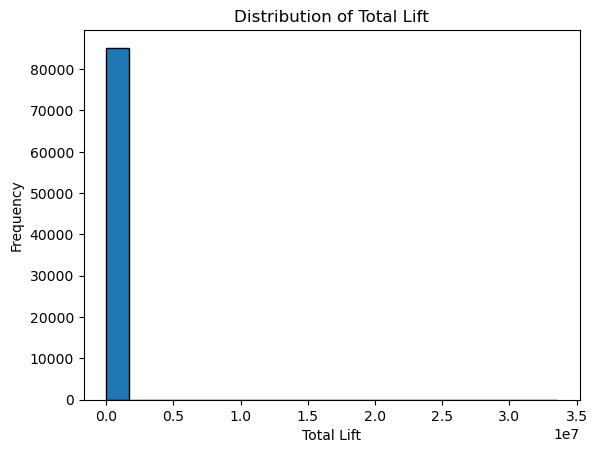

In [14]:
plt.hist(data_1['total_lift'], bins = 20, edgecolor = 'black')
plt.xlabel('Total Lift')
plt.ylabel('Frequency')
plt.title('Distribution of Total Lift')
plt.show()

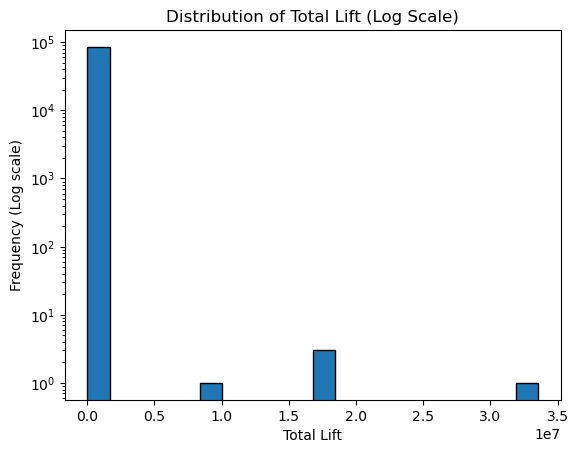

In [15]:
plt.hist(data_1['total_lift'], bins = 20, edgecolor = 'black', log = True)
plt.xlabel('Total Lift')
plt.ylabel('Frequency (Log scale)')
plt.title('Distribution of Total Lift (Log Scale)')
plt.show()

The distribution of total lift is right highly right skewed. 

In [20]:
features = ['age', 'height', 'weight', 'run400', 'run5k', 'candj', 'deadlift', 'backsq', 'pullups', 'total_lift']

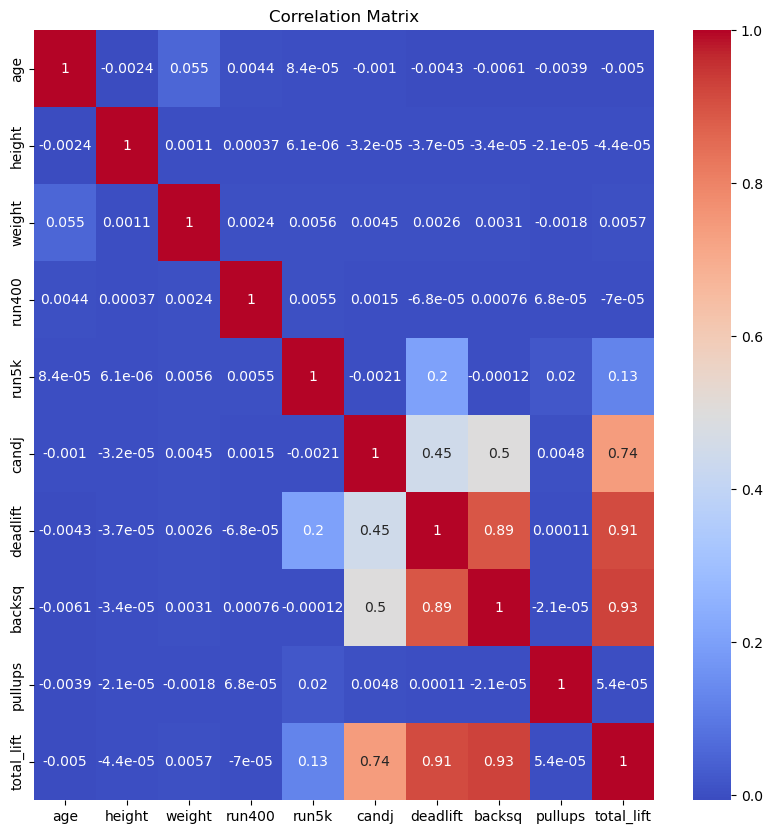

In [23]:
plt.figure(figsize=(10, 10))

corr = data_1[features].corr()

sns.heatmap(corr, annot = True, cmap = "coolwarm")
plt.title("Correlation Matrix")
plt.show()

We observe high correlation between total_lift and all of the columns summed to create total_lift as expected. We also observe high correlation between backsq and deadlift. We will not use these columns in our model, however, since they were used to construct the target variable.

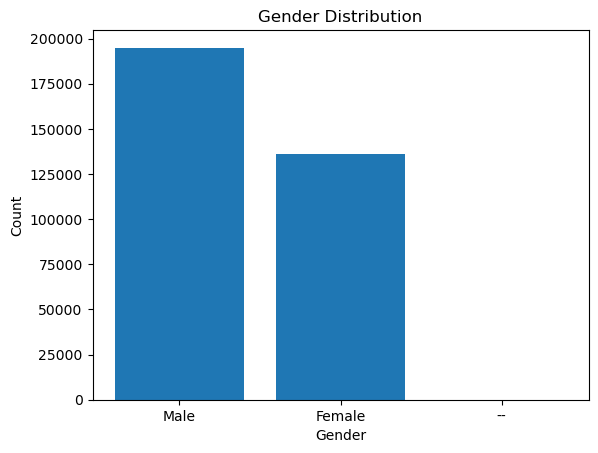

In [25]:
gender_counts = data_1['gender'].value_counts()


plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

There are more males than females in the dataset. 

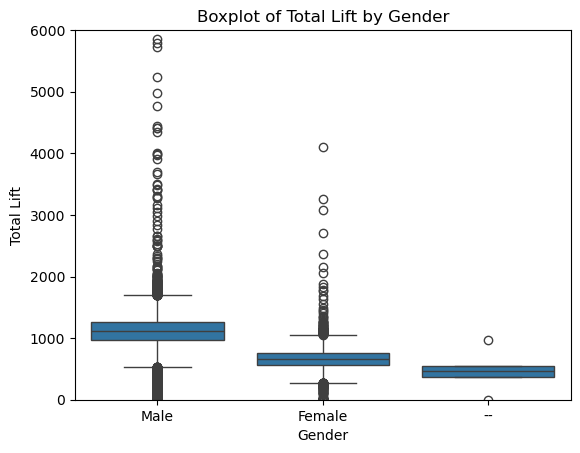

In [29]:
sns.boxplot(data = data_1, x = 'gender', y = 'total_lift')

plt.ylim(0, 6000)
plt.xlabel('Gender')
plt.ylabel('Total Lift')
plt.title('Boxplot of Total Lift by Gender')
plt.show()

The median total lift for females is lower than males, so gender could possibly be a significant predictor of total lift.

## EDA Version 2

In [59]:
data_2.columns

Index(['region', 'gender', 'age', 'height', 'weight', 'candj', 'snatch',
       'deadlift', 'backsq', 'eat', 'background', 'experience', 'schedule',
       'howlong', 'total_lift'],
      dtype='object')

In [61]:
data_2.shape

(30015, 15)

In [62]:
data_2.isnull().sum()

region        0
gender        0
age           0
height        0
weight        0
candj         0
snatch        0
deadlift      0
backsq        0
eat           0
background    0
experience    0
schedule      0
howlong       0
total_lift    0
dtype: int64

There are no missing values, as expected since we dropped null values.

In [64]:
data_2.describe()

,age,height,weight,candj,snatch,deadlift,backsq,total_lift
count,30015.000000,30015.000000,30015.000000,30015.000000,30015.000000,30015.000000,30015.000000,30015.000000
mean,32.125271,68.873397,177.146660,205.427520,156.178011,362.102815,294.141596,1017.849942
std,7.436255,3.774809,32.397735,58.696774,48.841798,96.451618,85.090633,277.579793
min,18.000000,52.000000,5.000000,1.000000,1.000000,1.000000,1.000000,4.000000
25%,27.000000,66.000000,155.000000,160.000000,120.000000,287.000000,225.000000,805.000000
50%,31.000000,69.000000,178.000000,205.000000,155.000000,375.000000,300.000000,1040.000000
75%,37.000000,72.000000,197.000000,245.000000,190.000000,435.000000,355.000000,1224.000000
max,56.000000,83.000000,474.000000,390.000000,386.000000,1000.000000,882.000000,2135.000000


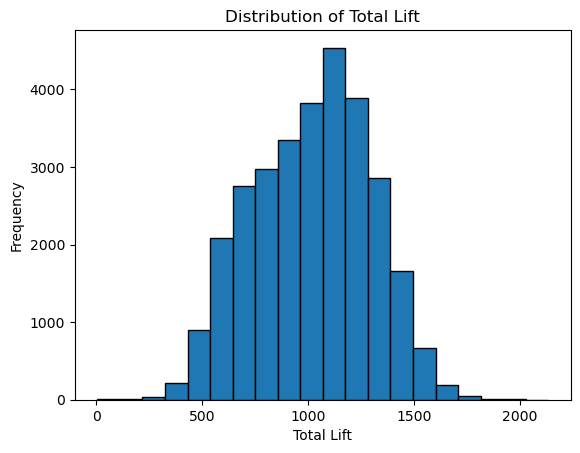

In [68]:
plt.hist(data_2['total_lift'], bins = 20, edgecolor = 'black')
plt.xlabel('Total Lift')
plt.ylabel('Frequency')
plt.title('Distribution of Total Lift')
plt.show()

After cleaning, the distribution of total lift has a more bell-curved shape compared to the previous right-skewed shape. The median appears to be around 1,000 - 2,000 .

In [71]:
features = ['age', 'height', 'weight', 'candj', 'deadlift', 'backsq', 'total_lift']

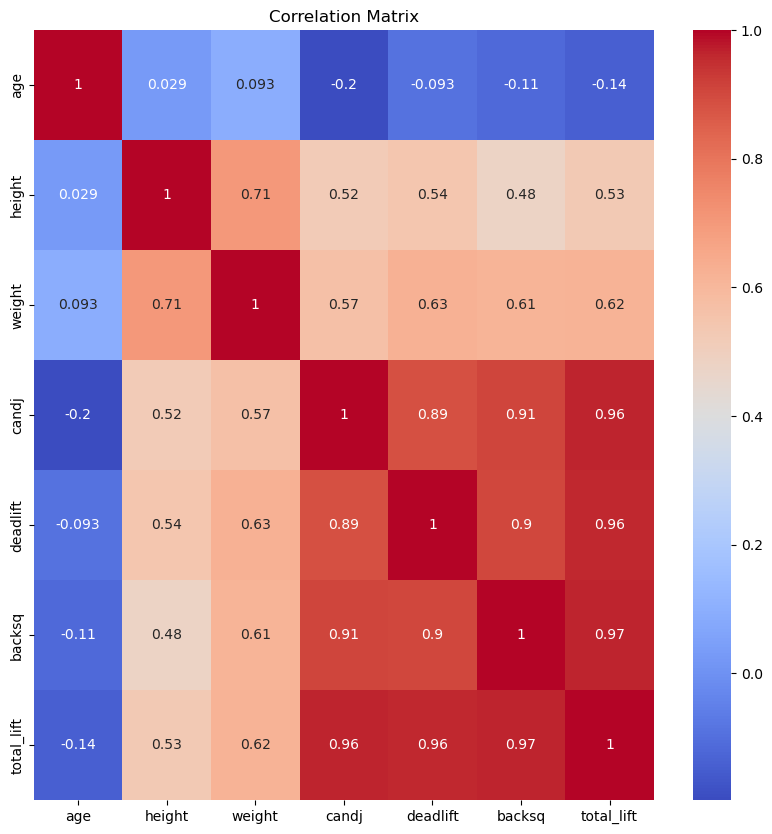

In [72]:
plt.figure(figsize=(10, 10))

corr = data_2[features].corr()

sns.heatmap(corr, annot = True, cmap = "coolwarm")
plt.title("Correlation Matrix")
plt.show()

There is high correlation between all of the columns that were used to sum total lift. Weight also has a high correlation with these columns as well. We will not use these columns in our model, however, since they were used to construct the target variable.

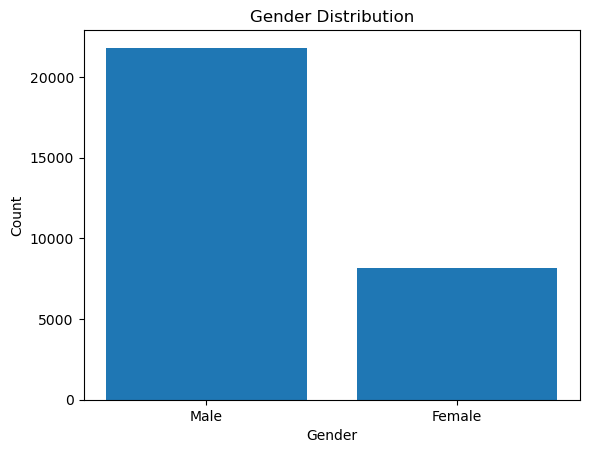

In [73]:
gender_counts = data_2['gender'].value_counts()


plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

There is a larger difference between the number of males and females in version 2 of the data compared to version 1.

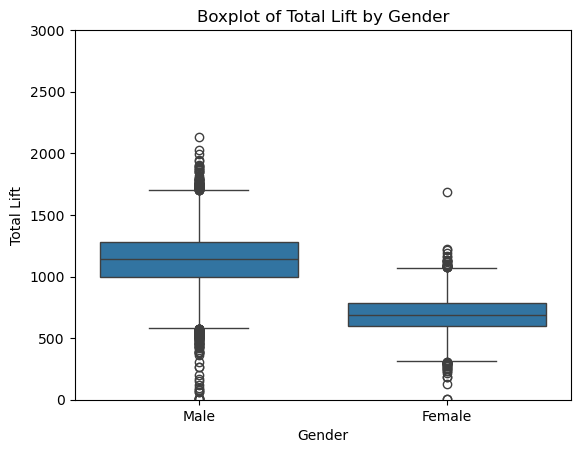

In [75]:
sns.boxplot(data = data_2, x = 'gender', y = 'total_lift')

plt.ylim(0, 3000)
plt.xlabel('Gender')
plt.ylabel('Total Lift')
plt.title('Boxplot of Total Lift by Gender')
plt.show()

The median total lift for females is lower than males, so gender could possibly be a significant predictor of total lift.

# Linear Regression Model 

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
def linreg_mod(train_df, test_df):
    # define cols 
    feature_cols = ['age', 'height', 'weight', 'gender']
    target_col = 'total_lift'

    # filter out NAs 
    train_df_clean = train_df.dropna(subset=feature_cols + [target_col])
    test_df_clean = test_df.dropna(subset=feature_cols + [target_col])

    # separate features and target
    X_train = train_df_clean[feature_cols]
    y_train = train_df_clean[target_col]

    X_test = test_df_clean[feature_cols]
    y_test = test_df_clean[target_col]

    # one-hot encode 'gender'
    X_train_encoded = pd.get_dummies(X_train, columns=['gender'], drop_first=True)
    X_test_encoded = pd.get_dummies(X_test, columns=['gender'], drop_first=True)

    # realign indexes 
    X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

    # train LR model
    linreg_model = LinearRegression()
    linreg_model.fit(X_train_encoded, y_train)

    # predict on test set
    y_pred = linreg_model.predict(X_test_encoded)

    # evaluate
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Test RMSE: {rmse:.2f}")
    print(f"Test R^2: {r2:.2f}")

    return linreg_model, y_pred, y_test

### Training Linear Regression Model on Data Version 1

In [51]:
res_1 = linreg_mod(train_data1, test_data1)

Test RMSE: 8393.98
Test R^2: -0.04


### Training Linear Regression Model on Data Version 2

In [52]:
res_2 = linreg_mod(train_data2, test_data2)

Test RMSE: 177.95
Test R^2: 0.59


## Model Comparison

The linear regression model performed poorly on the first version of the data, yielding high error and a negative R², indicating it was less effective than simply predicting the mean. In contrast, performance improved substantially on the second version of the data, with a positive R² and reduced error. This improvement is due to the removal of outliers and overall data cleaning, which allowed the model to better capture underlying relationships.